# 1. Loading the Dataset (scikit-learn version)

In [161]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [162]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [163]:
diabetes.data.shape

(442, 10)

Our data is correctly loaded with 442 instances and 10 variables

# 2. Spliting the dataset

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=2606)

In [165]:
print(X_train.shape,X_test.shape)

(331, 10) (111, 10)


# 3. Fitting the Lasso model

In [166]:
from sklearn.linear_model import Lasso 
lasso = Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.3618678961780615

Our Training Score is 0.362 

In [167]:
lasso.score(X_test,y_test)

0.3570766460365088

Our Test Score is 0.357

Let's Find out the number of features

In [168]:
lasso.coef_

array([  0.        ,  -0.        , 383.11855708,  25.10694904,
         0.        ,   0.        ,  -0.        ,   0.        ,
       285.0826159 ,   0.        ])

In [169]:
import numpy as np
np.sum(lasso.coef_ != 0)

3

In [170]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [171]:
coef=np.array(lasso.coef_!=0)
print('the feature names are:')
for i in range(len(coef)):
    if coef[i]==True:
        print(diabetes.feature_names[i])

the feature names are:
bmi
bp
s5


Values for Train R^2 = 0.362 & Test R^2 = 0.357 using the default parameters.
It uses 3 fetures namely BMI, BP & S5.

# 4. Loading the diabetes dataset from web

In [172]:
X = np.genfromtxt('diabetes.data.txt',skip_header=1,usecols=range(10))
y = np.genfromtxt('diabetes.data.txt',skip_header=1,usecols=10)

In [173]:
print(X.shape,y.shape)

(442, 10) (442,)


# 5. Splitting our web dataset

In [174]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=2606)

In [175]:
print(X_train1.shape,y_train1.shape)

(331, 10) (331,)


# 6. Fitting Lasso Model and comparing the results

In [176]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train1,y_train1)
lasso.score(X_train1,y_train1)

0.5187960096744919

Our Training Score is 0.519

In [177]:
lasso.score(X_test1,y_test1)

0.4635592424677511

Our Test Score is 0.464

Let's find out the number of features

In [178]:
lasso.coef_

array([ -0.23662796, -18.14477239,   6.01980254,   1.16339784,
         0.23600959,  -0.39047972,  -1.0264169 ,   1.70553107,
        28.27650774,   0.71408993])

In [179]:
import numpy as np
np.sum(lasso.coef_ != 0)

10

In [180]:
coef=np.array(lasso.coef_!=0)
print('the feature names are:')
for i in range(len(coef)):
    if coef[i]==True:
        print(diabetes.feature_names[i])

the feature names are:
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


Values for Train R^2 = 0.519 & Test R^2 = 0.464 using the default parameters. It uses all 10 fetures. 

Comparing the results of web dataset to the inbuit dataset the prediction accuracy is good but the number of features used is high.

# 7. Preprocessing the datasets using StandardScaler

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_scaled = scaler.transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# 8. Fit Lasso for scaled data

In [182]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train_scaled,y_train1)
lasso.score(X_train_scaled,y_train1)

0.5216022387949448

In [183]:
lasso.score(X_test_scaled,y_test1)

0.4779229890295727

In [184]:
lasso.coef_

array([-1.95442348, -9.80099448, 25.02800966, 14.87967102, -5.15153417,
       -0.        , -7.77978103,  1.99613392, 22.57110946,  6.74608709])

In [185]:
np.sum(lasso.coef_ != 0)

9

In [186]:
coef=np.array(lasso.coef_!=0)
print('the feature names are:')
for i in range(len(coef)):
    if coef[i]==True:
        print(diabetes.feature_names[i])

the feature names are:
age
sex
bmi
bp
s1
s3
s4
s5
s6


For scikit learn dataset <br>
Train Score = 0.362 <br>
Test Score = 0.357 <br>

For web dataset <br>
Train Score = 0.519 <br>
Test Score = 0.464 <br>

For Web Scaled dataset <br>
Train Score = 0.522 <br>
Test Score = 0.478 <br>

As we can see our current results i.e. results from web scaled dataset is closer to the results of web dataset. We expected our results to be closer to scikit learn dataset but that is not the case here. So our expectation of having results closer to the scikit learn dataset is not confirmed.

The reason for the above is mentioned in Description of the scikit learn version dataset which says as follows:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

Which means if we normalize by the way scikit learn version has been then we can expect the similar results. Also another reason for not having similar results is that we used default alpha value = 1 while normalizing using StandardScaler.

# 9. Trying different alpha values in Lasso

In [187]:
alpha = [0.01, 0.1, 0.25, 0.5, 1, 2.5, 5, 10, 20]
score=[]
features=[]

for i in alpha:
    lasso = Lasso(i,max_iter=10000).fit(X_train_scaled,y_train1)
    score = np.append(score,lasso.score(X_test_scaled, y_test1))
    features = np.append(features,np.sum(lasso.coef_ != 0))    

In [188]:
score

array([0.47477959, 0.47437765, 0.47319093, 0.47505835, 0.47792299,
       0.47987054, 0.47108553, 0.44752965, 0.36820675])

In [189]:
features

array([10.,  9.,  9.,  9.,  9.,  7.,  6.,  5.,  3.])

Text(0, 0.5, 'Score')

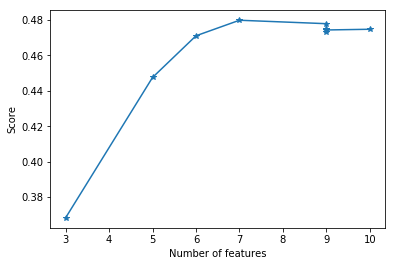

In [190]:
import matplotlib.pyplot as plt
plt.plot(features,score,marker='*')
plt.xlabel('Number of features')
plt.ylabel('Score')

I would prefer the point with 7 features which gives us score of 0.479 with alpha value as 2.5 because it gives us a good accuracy with less number of features used in it.

# 10. Regularization parameter for Lasso using cross-validation

In [191]:
parameters = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30, 50, 75, 100]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), parameters, cv=5)
grid_search.fit(X_train_scaled, y_train1)
grid_search.score(X_test_scaled, y_test1)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.4750583508498457

Test Score = 0.475

In [192]:
grid_search.score(X_train_scaled, y_train1)

0.5235359445360518

Train Score = 0.524

In [193]:
np.sum(grid_search.best_estimator_.coef_ != 0)

9

In [196]:
coef=np.array(grid_search.best_estimator_.coef_!=0)
print('the feature names are:')
for i in range(len(coef)):
    if coef[i]==True:
        print(diabetes.feature_names[i])

the feature names are:
age
sex
bmi
bp
s1
s3
s4
s5
s6


Number of features used = 9

# 11. Inductive Conformal Predictor

Let's split our train set into two calibration set of 99 samples and rest into training proper

In [197]:
X_train_proper, X_calib, y_train_proper, y_calib = train_test_split(X_train1, y_train1, test_size=99, random_state=2606)

In [198]:
X_train_proper.shape, X_calib.shape, y_train_proper.shape, y_calib.shape

((232, 10), (99, 10), (232,), (99,))

Preprocessing our train, test & calibration sets using StandardScaler

In [199]:
scaler = StandardScaler()
scaler.fit(X_train_proper)
X_train_proper_scaled = scaler.transform(X_train_proper)
X_calib_scaled = scaler.transform(X_calib)
X_test_scaled = scaler.transform(X_test1)

Training Lasso on train set proper

In [200]:
parameters = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30, 50, 75, 100]}
grid_search = GridSearchCV(Lasso(), parameters, cv=5)
grid_search.fit(X_train_proper_scaled, y_train_proper)

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 30, 50, 75, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

To compute our non-confirmity scores we define y_hat and then compute our scores as |yi-yi_hat|

In [201]:
y_calib_hat = grid_search.predict(X_calib_scaled)
non_confirmity_scores = abs(y_calib-y_calib_hat)

In [202]:
print(non_confirmity_scores)

[101.3450627   17.14994685  34.80554426  75.20236322  71.331452
  63.55124831  45.12710115  33.04000615   2.53322927  91.44557451
  51.0688909   10.72016856  35.95987227 139.74829501  89.30623698
  10.43053795 102.19772635  55.62274853   3.49302914  41.95741091
 105.77170968  64.27245777  22.36663344  18.57202251   0.96899743
  14.79564225  47.74636761  26.8165971   93.72836554  19.78488604
  22.00350295  29.19844315  24.35504567  83.30789424  33.89958725
  30.45501642  30.58118113  30.56787376  40.19404743   3.0267896
  25.36625183  29.00209165   0.27659556  35.71979374  43.47267525
  19.80041488  95.64646476   5.62813108  49.92736432  27.88948238
  25.09074547  22.63441763  19.74072459  60.5472342    3.38237683
  65.43671278  72.54137849  37.69666382  22.75647329   2.72718377
  10.37726163  91.00284435  28.82037868  40.5894559    5.90020285
  76.28212445  67.70914596  93.36827058  55.3706714   12.7167971
  98.44870565   7.90105374  37.91498077 119.81324568  88.74176129
  34.27795184 

Sorting the non_confirmity_scores

In [203]:
non_confirmity_scores_sorted = np.sort(non_confirmity_scores)

In [204]:
print(non_confirmity_scores_sorted)

[  0.27659556   0.96899743   2.53322927   2.56751176   2.72718377
   3.0267896    3.38237683   3.49302914   5.62813108   5.90020285
   6.722048     7.90105374  10.37726163  10.43053795  10.72016856
  11.31100494  11.498317    12.4210803   12.7167971   13.34535581
  14.79564225  17.14994685  17.16455133  18.57202251  19.74072459
  19.78488604  19.80041488  21.15718588  21.32421257  22.00350295
  22.36663344  22.63441763  22.75647329  24.35504567  25.09074547
  25.36625183  26.8165971   27.88948238  28.82037868  29.00209165
  29.19844315  30.41408023  30.45501642  30.56787376  30.58118113
  33.04000615  33.89958725  34.27795184  34.80554426  35.70374865
  35.71979374  35.95987227  37.69666382  37.91498077  39.59074098
  40.19404743  40.5894559   41.95741091  43.47267525  45.12710115
  47.74636761  48.20677526  49.91926509  49.92736432  51.0688909
  52.85751913  54.93361221  55.3706714   55.62274853  60.5472342
  61.10064891  63.55124831  64.25119455  64.27245777  65.43671278
  66.2818419

prediction intervals length at significance level 5%

In [205]:
m = 99 #size of calibration set
len_sig_level5 = non_confirmity_scores_sorted[m-1-int(np.floor(0.05*(m+1)))]
print(len_sig_level5)

101.2746116593157


prediction intervals length at significance level 20%

In [206]:
len_sig_level20 = non_confirmity_scores_sorted[m-1-int(np.floor(0.20*(m+1)))]
print(len_sig_level20)

72.5413784872635


Let's check the number of errors at significance 5% & 20% by comparing the actual label with the predicted label

In [207]:
error5 = 0 #initialize for error at 5%
error20 = 0 #initialize for error at 20%
y_test_hat = grid_search.predict(X_test_scaled)
for k in range(y_test1.size):
    if abs(y_test1[k]-y_test_hat[k]) > sig_level5:
        error5 += 1
    if abs(y_test1[k]-y_test_hat[k]) > sig_level20:
        error20 += 1

print(error5,error20)

5 23


So we got 5 wrong predictions at significance level 5% & 23 wrong predictions at significance level 20%m

Let's find out the Test Error rate

In [208]:
#error_rate = no.of.errors/total_samples
Test_error5 = error5/y_test1.size 
Test_error20 = error20/y_test1.size

print(Test_error5,Test_error20)

0.04504504504504504 0.2072072072072072


Test error rate at 5% = 0.045

Test error rate at 20% = 0.207

# 12. Results

For scikit-learn version of diabetes dataset. <br>
Train Score = 0.362 <br>
Test Score = 0.357 <br>
no. of features used = 3 (bmi,bp,s5) <br>

For original version of diabetes dataset <br>
Train Score = 0.519 <br>
Test Score = 0.464 <br>
no. of features used = 10 (age,sex,bmi,bp,s1,s2,s3,s4,s5,s6) <br>

For Our Scaled version of diabetes dataset <br>
Train Score = 0.522 <br>
Test Score = 0.478 <br>
no. of features used = 9 (age,sex,bmi,bp,s1,s3,s4,s5,s6) <br>

Results for Best parameters chosen by cross validation for our scaled version of diabetes dataset <br>
Train Score = 0.524 <br>
Test Score = 0.475 <br>
no. of features used = 9 (age,sex,bmi,bp,s1,s3,s4,s5,s6) <br>

Inductive Conformal Predictor results <br>
length of prediction interval at 5% significance level = 101.2746116593157 <br>
length of prediction interval at 20% significance level = 72.5413784872635 <br>

test error rate at 5% significance level = 0.045 <br>
test error rate at 20% significance level = 0.207 <br>